In [1]:
%load_ext autoreload
%autoreload

In [2]:
from utils_v1 import *


In [3]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerMCDropout
from src.backend.Logger import Logger


In [4]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [5]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [6]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": False,
	"learning_rate": 1e-4,
	"site": "MT",
	"training_date": "earlier" # values: earlier, current
}
print(config)

if config['site'] == 'PA':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2017, 2018]
	else:
		dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, 
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
elif config['site'] == 'MT':
	if config['training'] == True and config['training_date'] == 'earlier':
		dates = [2018, 2019]
	else:
		dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, 
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	

if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:


		if config['training_date'] == 'current': exp = 103
		elif config['training_date'] == 'earlier': exp = 124
		 
	if type(dataset) == MTMultipleDates:
		
		if config['training_date'] == 'current': exp = 116
		elif config['training_date'] == 'earlier': exp = 137		

	if type(dataset) == MAMultipleDates:
		exp = 146		
else:

	exp = 176

logger = Logger()
trainer = TrainerMCDropout(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': True, 'learning_rate': 0.0001}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [7]:
exp

103

In [8]:
trainer.setExperimentPath()
trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:

trainer.getLabelCurrentDeforestation()

In [14]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [15]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

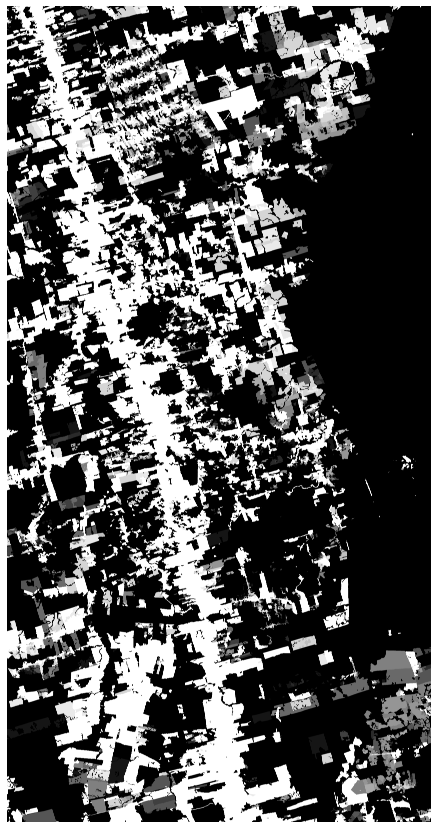

In [16]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [17]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [18]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [19]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [20]:
if config["training"] == True:
    trainer.extractCoords()

In [21]:
if config["training"] == True:
    trainer.trainTestSplit()

In [22]:
if config["training"] == True:
    trainer.label_mask.shape

In [23]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [24]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [25]:
if config["training"] == True:
    print(trainer.coords_train)

In [26]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [27]:
if config["training"] == True:
    inputSnipShow = True

In [28]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [29]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [30]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [31]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [32]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [33]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [34]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [35]:
if config["training"] == True:
    trainer.getGenerators()


In [36]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [37]:
if config["training"] == True:
    print(trainer.path_exp)

In [38]:
if config["training"] == True:
    print(trainer.channels)

In [39]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [40]:
if config["training"] == True:
    trainer.train()

In [41]:
if config["training"] == True:
    trainer.plotHistory()


In [42]:
trainer.image_stack.shape

(17730, 9200, 21)

In [43]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [44]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [45]:
trainer.image_stack.shape

(17730, 9200, 21)

In [46]:
trainer.setPadding()

-30.0 -16.0


In [47]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp103/models/resunet_0.h5'


Dropout training mode: True
time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [48]:
trainer.loadPredictedProbabilities()

In [49]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [50]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [51]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [52]:
trainer.getMeanProb()

In [53]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 7.0927625e-19
    np.mean(value): 0.013873931
    np.max(value): 0.99815524


In [54]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [55]:
trainer.unpadMeanProb()

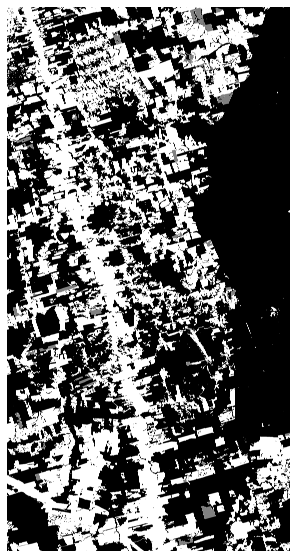

In [56]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [57]:
trainer.squeezeLabel()

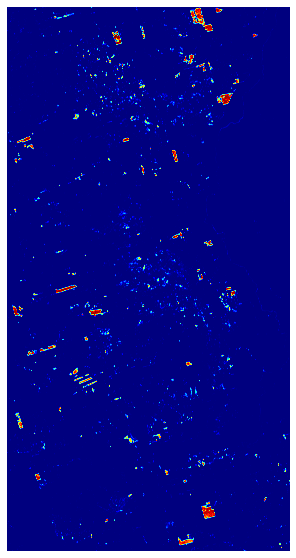

In [58]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [59]:
print(trainer.label_mask.shape)

(17730, 9200)


In [60]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [61]:
trainer.getMAP()

89.5


In [62]:
trainer.prob_rec.shape

(17760, 9216, 2, 10)

In [63]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 2)


In [64]:
trainer.prob_rec.shape

(10, 17760, 9216, 2)

In [65]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 1.6280115e-35
    np.mean(value): 0.3128397
    np.max(value): 1.0


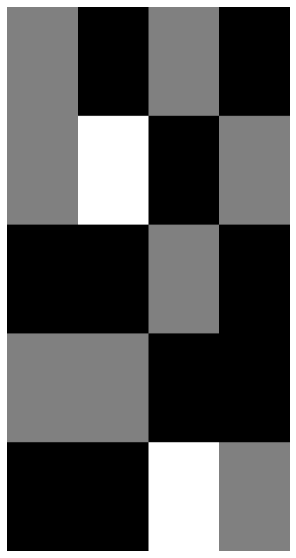

In [66]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [67]:
trainer.getLabelCurrentDeforestation()

In [68]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161257772,   1858228], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [69]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [70]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161257772,   1858228], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161432551,   1683449], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162941221,    174779], dtype=int64))


In [71]:
trainer.calculateMetrics()

ic| self.f1: 84.67, self.precision: 88.62, self.recall: 81.06


In [72]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9431673,)
ic| f1_val: 86.98
    precision_val: 84.26
    recall_val: 89.89
    mAP_val: 92.45


In [73]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [74]:
trainer.get_label_no_buffer()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [75]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162515145,    600855], dtype=int64))


In [76]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


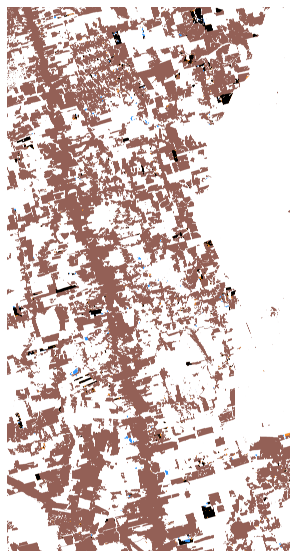

In [77]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [78]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [79]:
trainer.setUncertainty()

K = 2, pred_mean shape (17760, 9216, 2)


In [97]:
trainer.uncertainty_map[trainer.uncertainty_map>1] = 1

In [98]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.036333423
    np.max(value): 1.0


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

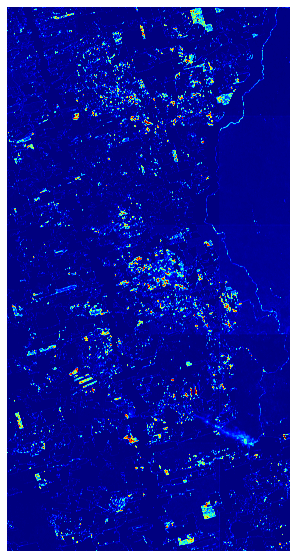

In [99]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



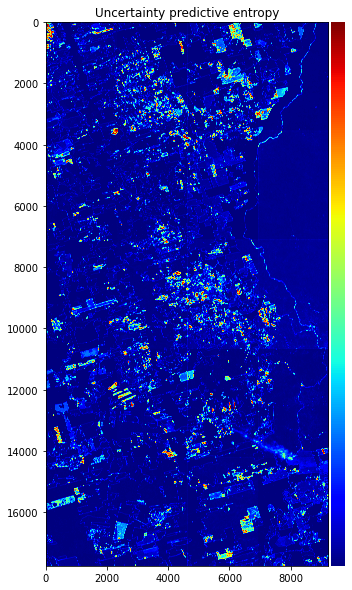

In [100]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [101]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54151724,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


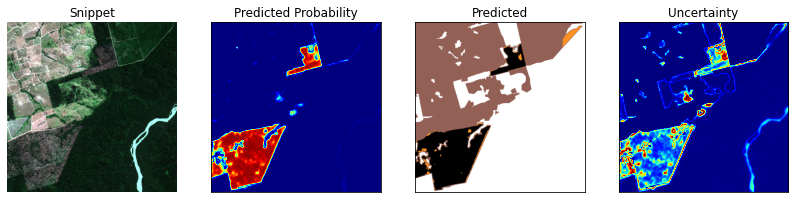

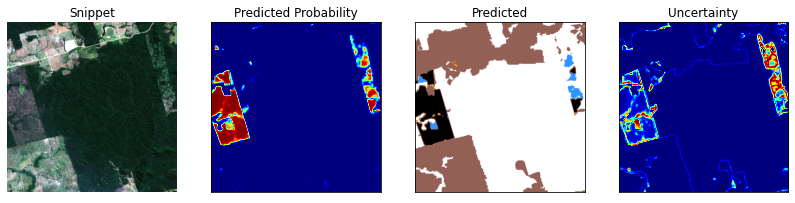

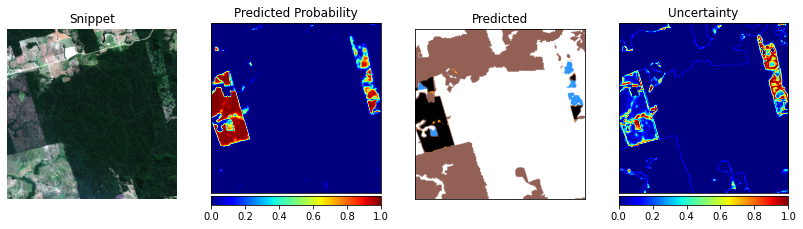

In [102]:
trainer.logger.plotCropSample(trainer)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


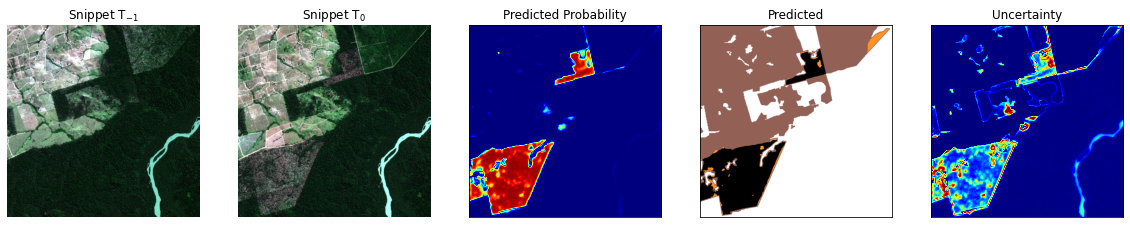

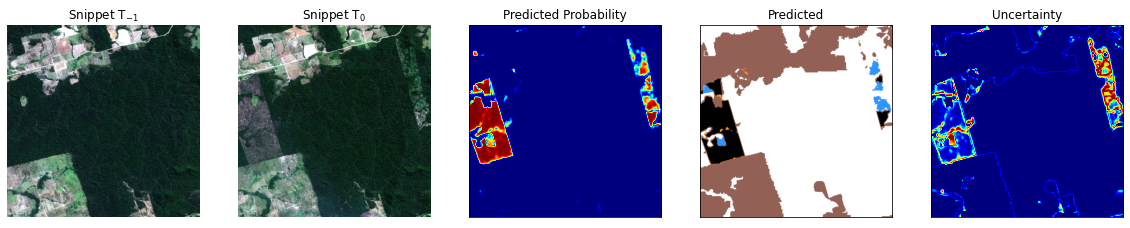

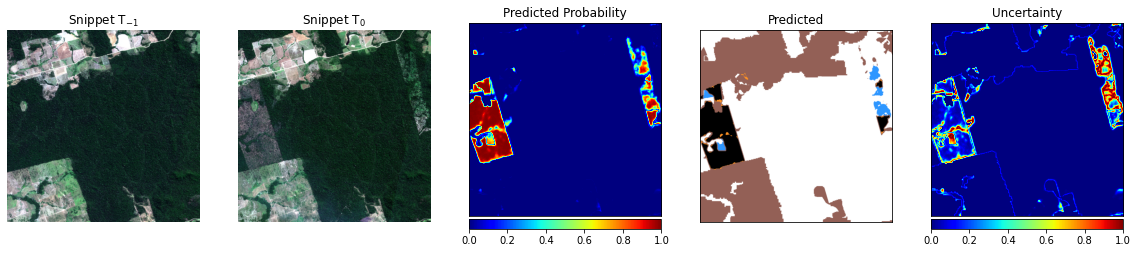

In [103]:
trainer.logger.plotCropSampleT0T1(trainer)

In [104]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [105]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [106]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 7.3577016e-06
    np.mean(value): 0.05019259
    np.max(value): 1.0


In [107]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

Get precision-recall threshold

In [108]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54151724,)
    self.label_mask_current_deforestation_test.shape: (54151724,)


[0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.997, 0.9985]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (12034785,)
    predicted_test_classified_incorrect.shape: (12034785,)
ic| TP_H + FN_H + FP_H + TN_H: 12034785
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 12034785
    len(label_mask_current_deforestation_test): 54151724


[1.         0.21219366 0.00241029 0.22224195 0.88586564 0.81744799
 0.01740565]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (7287970,)
    predicted_test_classified_incorrect.shape: (7287970,)
ic| TP_H + FN_H + FP_H + TN_H: 7287970
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 7287970
    len(label_mask_current_deforestation_test): 54151724


[1.         0.58901845 0.01838338 0.13458427 0.88383167 0.81771048
 0.02832948]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (5380682,)
    predicted_test_classified_incorrect.shape: (5380682,)
ic| TP_H + FN_H + FP_H + TN_H: 5380682
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 5380682
    len(label_mask_current_deforestation_test): 54151724


[1.         0.79891162 0.07037095 0.09936308 0.87667884 0.81169934
 0.03766116]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (3712070,)
    predicted_test_classified_incorrect.shape: (3712070,)
ic| TP_H + FN_H + FP_H + TN_H: 3712070
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 3712070
    len(label_mask_current_deforestation_test): 54151724


[0.9970841  0.90167832 0.22659439 0.06854943 0.84949866 0.77999311
 0.05293675]
threshold 0.4


ic| label_current_deforestation_test_classified_incorrect.shape: (2169806,)
    predicted_test_classified_incorrect.shape: (2169806,)
ic| TP_H + FN_H + FP_H + TN_H: 2169806
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 2169806
    len(label_mask_current_deforestation_test): 54151724


[0.98604457 0.92866608 0.48155008 0.04006901 0.77175509 0.68338504
 0.08352115]
threshold 0.5


ic| label_current_deforestation_test_classified_incorrect.shape: (1601878,)
    predicted_test_classified_incorrect.shape: (1601878,)
ic| TP_H + FN_H + FP_H + TN_H: 1601878
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1601878
    len(label_mask_current_deforestation_test): 54151724


[0.97943909 0.92700567 0.5586875  0.02958129 0.73162891 0.6339607
 0.10660583]
threshold 0.6


ic| label_current_deforestation_test_classified_incorrect.shape: (1094912,)
    predicted_test_classified_incorrect.shape: (1094912,)
ic| TP_H + FN_H + FP_H + TN_H: 1094912
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1094912
    len(label_mask_current_deforestation_test): 54151724


[0.9699779  0.92332555 0.61873291 0.02021934 0.6930322  0.58153348
 0.14320667]
threshold 0.7


ic| label_current_deforestation_test_classified_incorrect.shape: (876765,)
    predicted_test_classified_incorrect.shape: (876765,)
ic| TP_H + FN_H + FP_H + TN_H: 876765
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 876765
    len(label_mask_current_deforestation_test): 54151724


[0.95580998 0.91742002 0.66986364 0.0161909  0.65794252 0.52145513
 0.15780804]
threshold 0.8


ic| label_current_deforestation_test_classified_incorrect.shape: (681639,)
    predicted_test_classified_incorrect.shape: (681639,)
ic| TP_H + FN_H + FP_H + TN_H: 681639
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 681639
    len(label_mask_current_deforestation_test): 54151724


[0.93838123 0.90918108 0.71819436 0.01258758 0.61857264 0.43976289
 0.16720727]
threshold 0.9


ic| label_current_deforestation_test_classified_incorrect.shape: (493341,)
    predicted_test_classified_incorrect.shape: (493341,)
ic| TP_H + FN_H + FP_H + TN_H: 493341
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 493341
    len(label_mask_current_deforestation_test): 54151724


[0.91779718 0.89780635 0.76222458 0.00911035 0.57419084 0.32015718
 0.16791521]
threshold 0.997


ic| label_current_deforestation_test_classified_incorrect.shape: (287539,)
    predicted_test_classified_incorrect.shape: (287539,)
ic| TP_H + FN_H + FP_H + TN_H: 287539
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 287539
    len(label_mask_current_deforestation_test): 54151724


[0.89324015 0.87818292 0.80030716 0.00530988 0.54790549 0.11576449
 0.14550387]
threshold 0.9985


ic| label_current_deforestation_test_classified_incorrect.shape: (283709,)
    predicted_test_classified_incorrect.shape: (283709,)
ic| TP_H + FN_H + FP_H + TN_H: 283709
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 283709
    len(label_mask_current_deforestation_test): 54151724


[0.89285606 0.87770327 0.80087477 0.00523915 0.54744749 0.11079396
 0.144789  ]


In [109]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54151724,)
    self.label_mask_current_deforestation_test.shape: (54151724,)


threshold 0.025
(54151724,) (54151724,)
cm_audited [[53415298        0]
 [    6590   729836]]
[1.         0.99105138]
threshold 0.05
(54151724,) (54151724,)
cm_audited [[53415298        0]
 [    9446   726980]]
[1.         0.98717319]
threshold 0.1
(54151724,) (54151724,)
cm_audited [[53415298        0]
 [   13044   723382]]
[1.         0.98228743]
threshold 0.2
(54151724,) (54151724,)
cm_audited [[53414810      488]
 [   18196   718230]]
[0.99932101 0.97529148]
threshold 0.4
(54151724,) (54151724,)
cm_audited [[53410279     5019]
 [   27240   709186]]
[0.99297261 0.96301054]
threshold 0.5
(54151724,) (54151724,)
cm_audited [[53406661     8637]
 [   32397   704029]]
[0.98788072 0.9560078 ]
threshold 0.6
(54151724,) (54151724,)
cm_audited [[53401195    14103]
 [   37838   698588]]
[0.98021162 0.94861941]
threshold 0.7
(54151724,) (54151724,)
cm_audited [[53392491    22807]
 [   44404   692022]]
[0.96809447 0.93970338]
threshold 0.8
(54151724,) (54151724,)
cm_audited [[53380568    34730]

ic| metric_values_audited: array([[1.        , 0.99105138],
                                  [1.        , 0.98717319],
                                  [1.        , 0.98228743],
                                  [0.99932101, 0.97529148],
                                  [0.99297261, 0.96301054],
                                  [0.98788072, 0.9560078 ],
                                  [0.98021162, 0.94861941],
                                  [0.96809447, 0.93970338],
                                  [0.95165134, 0.92825892],
                                  [0.93044488, 0.91323908],
                                  [0.90285514, 0.88898545],
                                  [0.90238227, 0.88840834]])


cm_audited [[53344523    70775]
 [   82179   654247]]
[0.90238227 0.88840834]


In [110]:
trainer.setPlotLimsForUncertaintyAA()

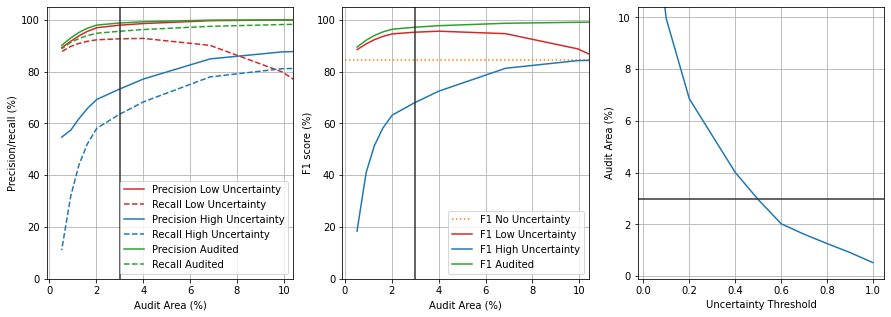

In [111]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA(normalize_xlim=False)

In [112]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.38232011321635484
threshold 0.38232011321635484


ic| label_current_deforestation_test_classified_incorrect.shape: (2270527,)
    predicted_test_classified_incorrect.shape: (2270527,)
ic| TP_H + FN_H + FP_H + TN_H: 2270527
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 2270527
    len(label_mask_current_deforestation_test): 54151724


[0.98722529 0.92847627 0.46561365 0.04192899 0.77858826 0.69196888
 0.08052871]
0.6176798867836452
threshold 0.6176798867836452


ic| label_current_deforestation_test_classified_incorrect.shape: (1052993,)
    predicted_test_classified_incorrect.shape: (1052993,)
ic| TP_H + FN_H + FP_H + TN_H: 1052993
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1052993
    len(label_mask_current_deforestation_test): 54151724


[0.96781509 0.92248762 0.62821519 0.01944524 0.68661516 0.57165661
 0.14623604]
0.7631402264327096
threshold 0.7631402264327096


ic| label_current_deforestation_test_classified_incorrect.shape: (751647,)
    predicted_test_classified_incorrect.shape: (751647,)
ic| TP_H + FN_H + FP_H + TN_H: 751647
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 751647
    len(label_mask_current_deforestation_test): 54151724


[0.94490984 0.91255023 0.70059178 0.01388039 0.63478118 0.47350482
 0.16441422]
0.5252127129144126
threshold 0.5252127129144126


ic| label_current_deforestation_test_classified_incorrect.shape: (1401933,)
    predicted_test_classified_incorrect.shape: (1401933,)
ic| TP_H + FN_H + FP_H + TN_H: 1401933
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1401933
    len(label_mask_current_deforestation_test): 54151724


[0.97756443 0.92625434 0.57504352 0.02588898 0.72147581 0.62116584
 0.11951489]
0.5055234467957141
threshold 0.5055234467957141


ic| label_current_deforestation_test_classified_incorrect.shape: (1564499,)
    predicted_test_classified_incorrect.shape: (1564499,)
ic| TP_H + FN_H + FP_H + TN_H: 1564499
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1564499
    len(label_mask_current_deforestation_test): 54151724


[0.97902143 0.9268612  0.56234978 0.02889103 0.72943261 0.63116933
 0.10872936]
0.45846396089569014
threshold 0.45846396089569014


ic| label_current_deforestation_test_classified_incorrect.shape: (1849013,)
    predicted_test_classified_incorrect.shape: (1849013,)
ic| TP_H + FN_H + FP_H + TN_H: 1849013
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1849013
    len(label_mask_current_deforestation_test): 54151724


[0.98234579 0.92797182 0.52914074 0.03414504 0.74839851 0.65481648
 0.09485904]
0.4919167422943736
threshold 0.4919167422943736


ic| label_current_deforestation_test_classified_incorrect.shape: (1653182,)
    predicted_test_classified_incorrect.shape: (1653182,)
ic| TP_H + FN_H + FP_H + TN_H: 1653182
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1653182
    len(label_mask_current_deforestation_test): 54151724


[0.98004517 0.92718476 0.5532708  0.0305287  0.73481291 0.63802549
 0.10385975]
0.4922556261674516
threshold 0.4922556261674516


ic| label_current_deforestation_test_classified_incorrect.shape: (1651086,)
    predicted_test_classified_incorrect.shape: (1651086,)
ic| TP_H + FN_H + FP_H + TN_H: 1651086
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1651086
    len(label_mask_current_deforestation_test): 54151724


[0.98001467 0.92716954 0.55347448 0.03049    0.73470417 0.6378834
 0.10396561]
0.4969165508442442
threshold 0.4969165508442442


ic| label_current_deforestation_test_classified_incorrect.shape: (1621868,)
    predicted_test_classified_incorrect.shape: (1621868,)
ic| TP_H + FN_H + FP_H + TN_H: 1621868
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1621868
    len(label_mask_current_deforestation_test): 54151724


[0.97963076 0.92705709 0.5566099  0.02995044 0.73291115 0.63555146
 0.10549649]
0.5002040925600718
threshold 0.5002040925600718


ic| label_current_deforestation_test_classified_incorrect.shape: (1600529,)
    predicted_test_classified_incorrect.shape: (1600529,)
ic| TP_H + FN_H + FP_H + TN_H: 1600529
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1600529
    len(label_mask_current_deforestation_test): 54151724


[0.97942165 0.92700452 0.55885045 0.02955638 0.7315307  0.63383219
 0.10667995]
0.49633804166353984
threshold 0.49633804166353984


ic| label_current_deforestation_test_classified_incorrect.shape: (1625577,)
    predicted_test_classified_incorrect.shape: (1625577,)
ic| TP_H + FN_H + FP_H + TN_H: 1625577
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1625577
    len(label_mask_current_deforestation_test): 54151724


[0.97967101 0.92705912 0.55622968 0.03001893 0.73313789 0.63584826
 0.10529219]
0.49509823642630213
threshold 0.49509823642630213


ic| label_current_deforestation_test_classified_incorrect.shape: (1633531,)
    predicted_test_classified_incorrect.shape: (1633531,)
ic| TP_H + FN_H + FP_H + TN_H: 1633531
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1633531
    len(label_mask_current_deforestation_test): 54151724


[0.97975767 0.92707684 0.5553742  0.03016582 0.7336511  0.63650034
 0.10486324]
0.49637138235875605
threshold 0.49637138235875605


ic| label_current_deforestation_test_classified_incorrect.shape: (1625356,)
    predicted_test_classified_incorrect.shape: (1625356,)
ic| TP_H + FN_H + FP_H + TN_H: 1625356
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1625356
    len(label_mask_current_deforestation_test): 54151724


[0.97966485 0.9270579  0.55625412 0.03001485 0.73312769 0.63583032
 0.10530283]
0.4965449995772538
threshold 0.4965449995772538


ic| label_current_deforestation_test_classified_incorrect.shape: (1624253,)
    predicted_test_classified_incorrect.shape: (1624253,)
ic| TP_H + FN_H + FP_H + TN_H: 1624253
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1624253
    len(label_mask_current_deforestation_test): 54151724


[0.9796522  0.92705382 0.55635868 0.02999448 0.73306732 0.63575237
 0.10536264]
0.496686919532681
threshold 0.496686919532681


ic| label_current_deforestation_test_classified_incorrect.shape: (1623347,)
    predicted_test_classified_incorrect.shape: (1623347,)
ic| TP_H + FN_H + FP_H + TN_H: 1623347
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1623347
    len(label_mask_current_deforestation_test): 54151724


[0.97964638 0.92705958 0.55645781 0.02997775 0.73300248 0.63566853
 0.10541535]
0.4965116588789679
threshold 0.4965116588789679


ic| label_current_deforestation_test_classified_incorrect.shape: (1624467,)
    predicted_test_classified_incorrect.shape: (1624467,)
ic| TP_H + FN_H + FP_H + TN_H: 1624467
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1624467
    len(label_mask_current_deforestation_test): 54151724


[0.9796583  0.92705279 0.55633288 0.02999844 0.73307857 0.63577371
 0.10535175]
0.49647831818117655
threshold 0.49647831818117655


ic| label_current_deforestation_test_classified_incorrect.shape: (1624674,)
    predicted_test_classified_incorrect.shape: (1624674,)
ic| TP_H + FN_H + FP_H + TN_H: 1624674
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1624674
    len(label_mask_current_deforestation_test): 54151724
ic| self.threshold_optimal: 0.4965116588789679


[0.97966001 0.92705274 0.55631523 0.03000226 0.73308929 0.63578763
 0.10533998]


In [113]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.4965116588789679


ic| label_current_deforestation_test_classified_incorrect.shape: (1624467,)
    predicted_test_classified_incorrect.shape: (1624467,)
ic| TP_H + FN_H + FP_H + TN_H: 1624467
    len(label_mask_current_deforestation_test): 54151724
ic| TP_H + FN_H + FP_H + TN_H: 1624467
    len(label_mask_current_deforestation_test): 54151724


[0.9796583  0.92705279 0.55633288 0.02999844 0.73307857 0.63577371
 0.10535175]
threshold 0.4965116588789679
(54151724,) (54151724,)


ic| self.m_optimal: {'AA': array([0.02999844]),
                     'UEO': array([0.10535175]),
                     'f1': 84.67,
                     'f1_H': array([0.68096768]),
                     'f1_L': array([0.95262986]),
                     'precision_H': array([0.73307857]),
                     'precision_L': array([0.9796583]),
                     'recall_H': array([0.63577371]),
                     'recall_L': array([0.92705279]),
                     'recall_Ltotal': array([0.55633288])}
ic| self.m_audited_optimal: {'f1': array([0.97188296]),
                             'precision': array([0.98806362]),
                             'recall': array([0.95622371])}


cm_audited [[53406791     8507]
 [   32238   704188]]
[0.98806362 0.95622371]


{'metrics': {'precision_L': array([0.9796583]),
  'recall_L': array([0.92705279]),
  'recall_Ltotal': array([0.55633288]),
  'AA': array([0.02999844]),
  'precision_H': array([0.73307857]),
  'recall_H': array([0.63577371]),
  'UEO': array([0.10535175]),
  'f1_L': array([0.95262986]),
  'f1_H': array([0.68096768]),
  'f1': 84.67},
 'metrics_audited': {'precision': array([0.98806362]),
  'recall': array([0.95622371]),
  'f1': array([0.97188296])},
 'exp': 103}